# Исследование задержек авиарейсов в аэропортах Нью-Йорка в 2013 году

# Цель отчета: 

Раскрыть характер и особенности задержек авиарейсов.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
a1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
a2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'    

flights = pd.read_csv(a1, sep=',')
weather = pd.read_csv(a2, sep=',')

Рассмотрим, насколько часто люди сталкиваются с проблемой задержки авиарейсов:

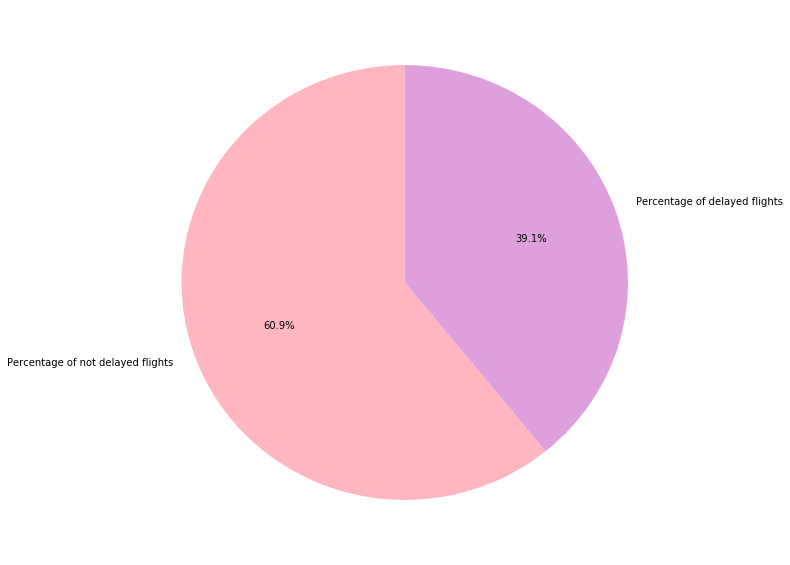

In [58]:
delay = flights.groupby(flights[flights.dep_delay>0]['hour']).size().reset_index(name = 'del_ammount')
flight = flights.groupby('hour').size().reset_index(name = 'fl_ammount')
total = pd.merge(delay, flight, on = 'hour')
fl_ammount = total['fl_ammount'].sum()
del_ammount = total['del_ammount'].sum()
total['Percentage'] = (total['del_ammount'] / total['fl_ammount']) * 100
colors=["lightpink", "plum"]
plt.figure(figsize=(10,10))
plt.pie([fl_ammount - del_ammount, del_ammount],
       labels=['Percentage of not delayed flights', 'Percentage of delayed flights'], colors=colors,
        autopct='%1.1f%%', startangle=90)
plt.show()

39,1% рейсов задерживаются, следовательно, проблема задержки авиарейсов является очень актуальной.

Рассмотрим зависимость задержек авиарейсов от месяца:

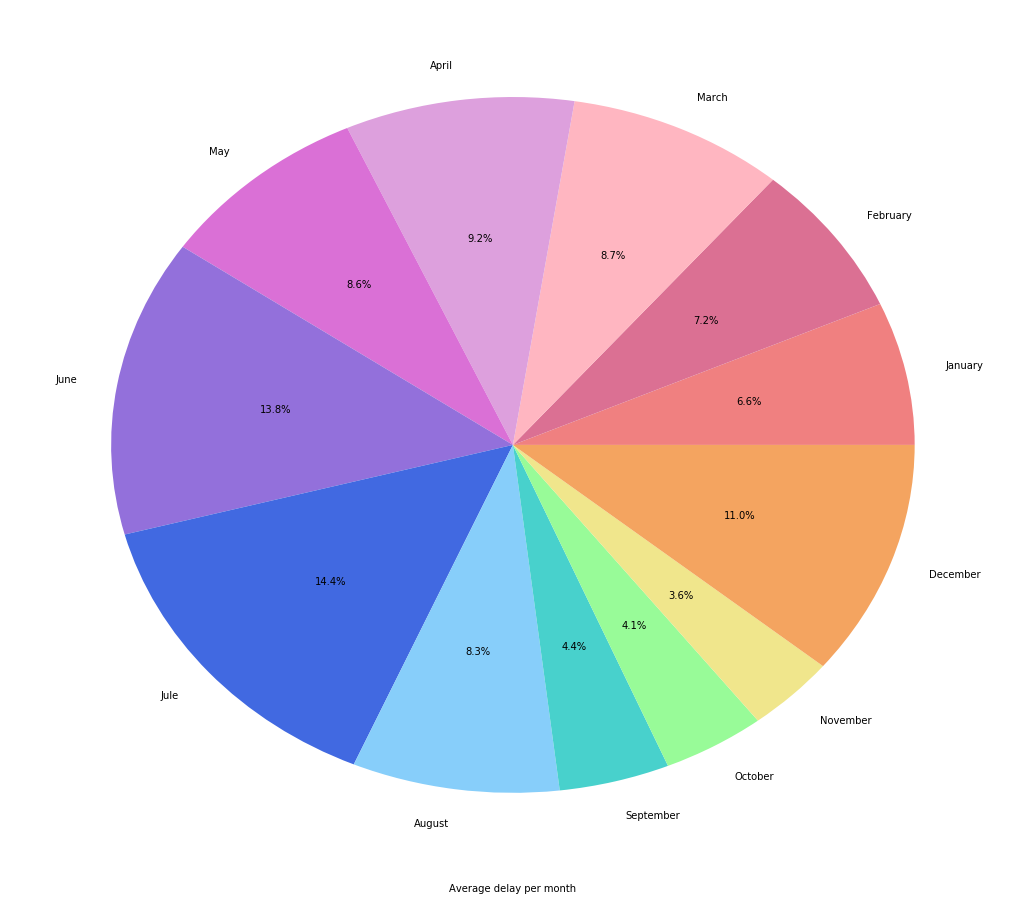

In [59]:
month_flights = flights.groupby("month")
average_delay = month_flights['dep_delay'].mean()

labels = ["January", "February", "March", "April", "May", "June", "Jule", "August",
          "September", "October", "November", "December" ]
colors=["lightcoral", "palevioletred", "lightpink", "plum", "orchid", "mediumpurple", 
        "royalblue", "lightskyblue", "mediumturquoise", "palegreen", "khaki", "sandybrown"]
plt.figure(figsize=(18,16))
plt.pie(average_delay, colors=colors, labels = labels, autopct='%1.1f%%')
plt.xlabel("Average delay per month")
plt.show()

Наибольшее количество задержек рейсов происходит летом и в декабре, следовательно в эти месяцы следует увеличить количество персонала для повышения скорости обслуживания посетителей аэропорта.

Рассмотрим зависимость задержки от времени суток:

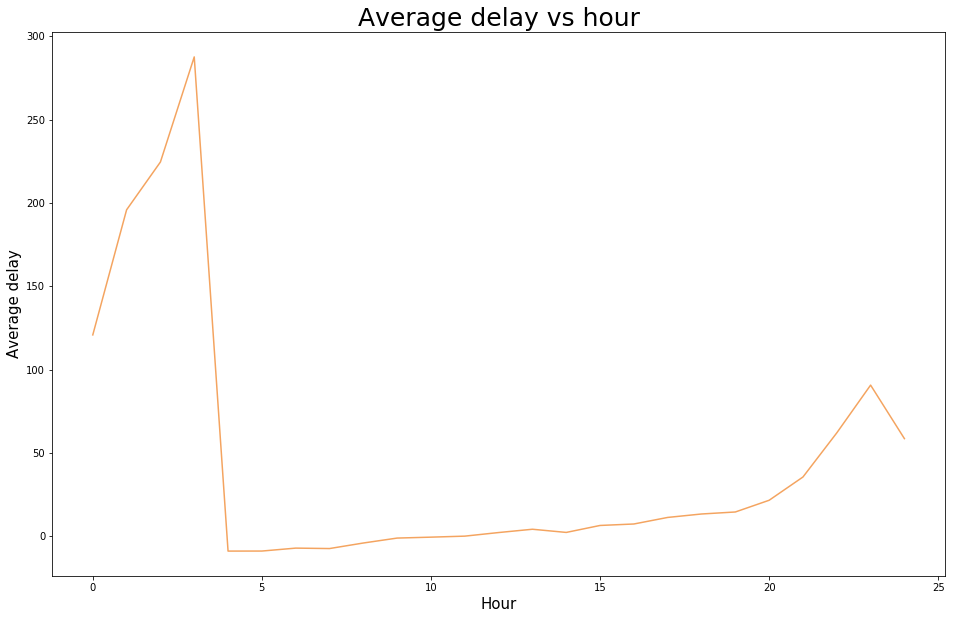

In [43]:
arr_del = flights.dropna(subset=['arr_delay'])
arr_del['arr_delay'].abs()
arr_del = arr_del.groupby('hour')['arr_delay'].mean()
plt.figure(figsize=(16,10))
plt.plot(arr_del.index, arr_del, c='sandybrown')
plt.xlabel('Hour', size=15)
plt.ylabel('Average delay', size=15)
plt.title('Average delay vs hour', size=25)
plt.show()

В основном задержка происходит с 0 до 3 часов ночи, следовательно, стоит увеличить количество персонала, работающего в ночную смену.

Рассмотрим зависимость задержек авиарейсов от различных погодных факторов:

~ зависимость от температуры:

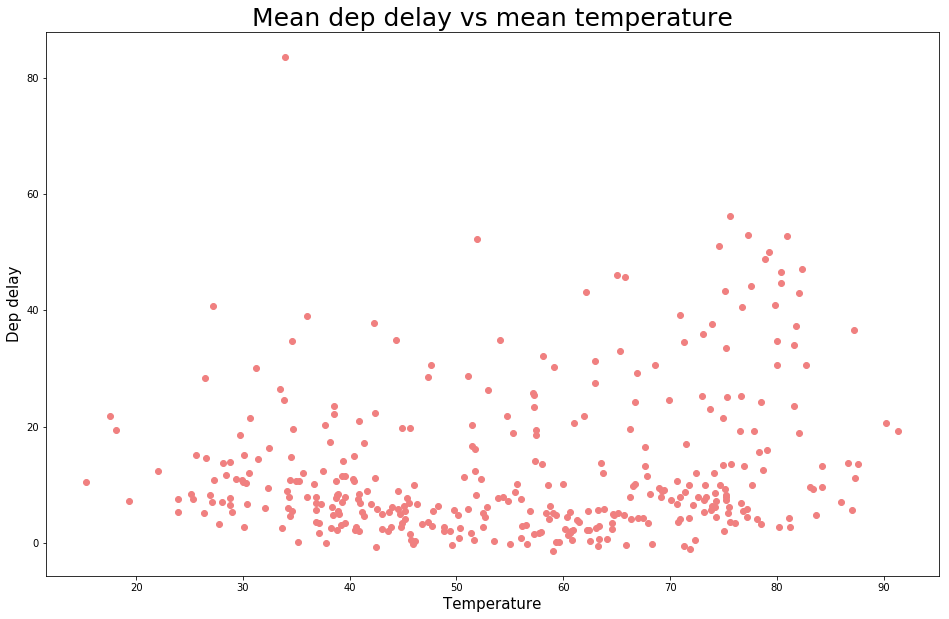

In [36]:
flight_weather = flights.merge(weather, on=['year', 'month', 'day', 'hour', 'origin'], how='inner' )

plt.figure(figsize=(16,10))
temp = flight_weather.groupby(['month', 'day'])['temp'].mean()
delay = flights.groupby(['month', 'day'])['dep_delay'].mean()
delay_correct = delay.drop(labels = [delay.index[-1]])
plt.scatter(temp, delay_correct, c='lightcoral')
plt.xlabel('Temperature', size=15)
plt.ylabel('Dep delay', size=15)
plt.title('Mean dep delay vs mean temperature', size=25)
plt.show()

          Количество задержек практически не зависит от темпеарутры воздуха.

~ зависимость от атмосферного давления:

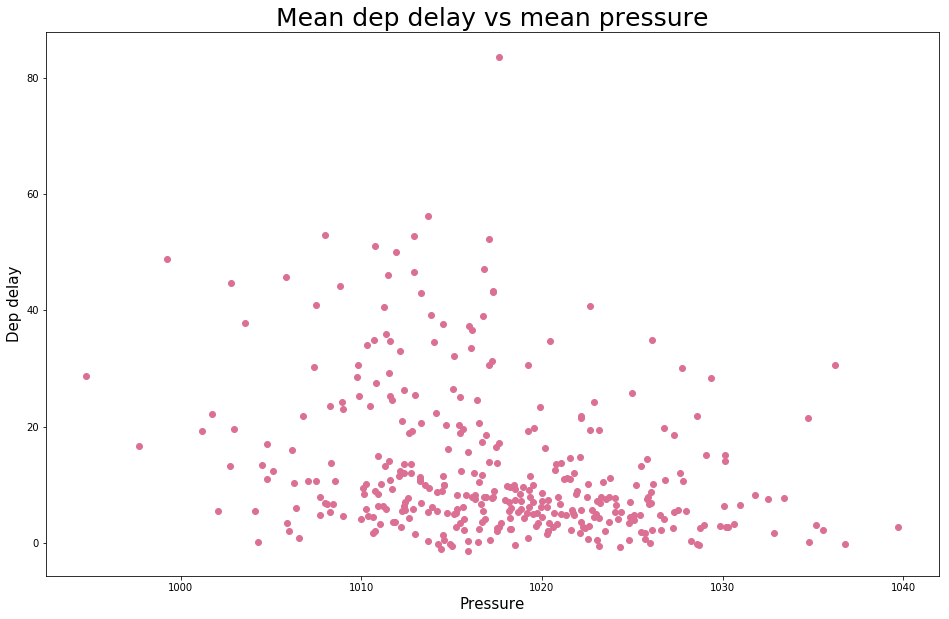

In [35]:
plt.figure(figsize=(16,10))
pressure = flight_weather.groupby(['month', 'day'])['pressure'].mean()
delay = flights.groupby(['month', 'day'])['dep_delay'].mean()
delay_correct = delay.drop(labels = [delay.index[-1]])
plt.scatter(pressure, delay_correct, c='palevioletred')
plt.xlabel('Pressure', size=15)
plt.ylabel('Dep delay', size=15)
plt.title('Mean dep delay vs mean pressure', size=25)
plt.show()

          Количество задержек практически не зависит от темпеарутры воздуха.

~ зависимость от влажности воздуха:

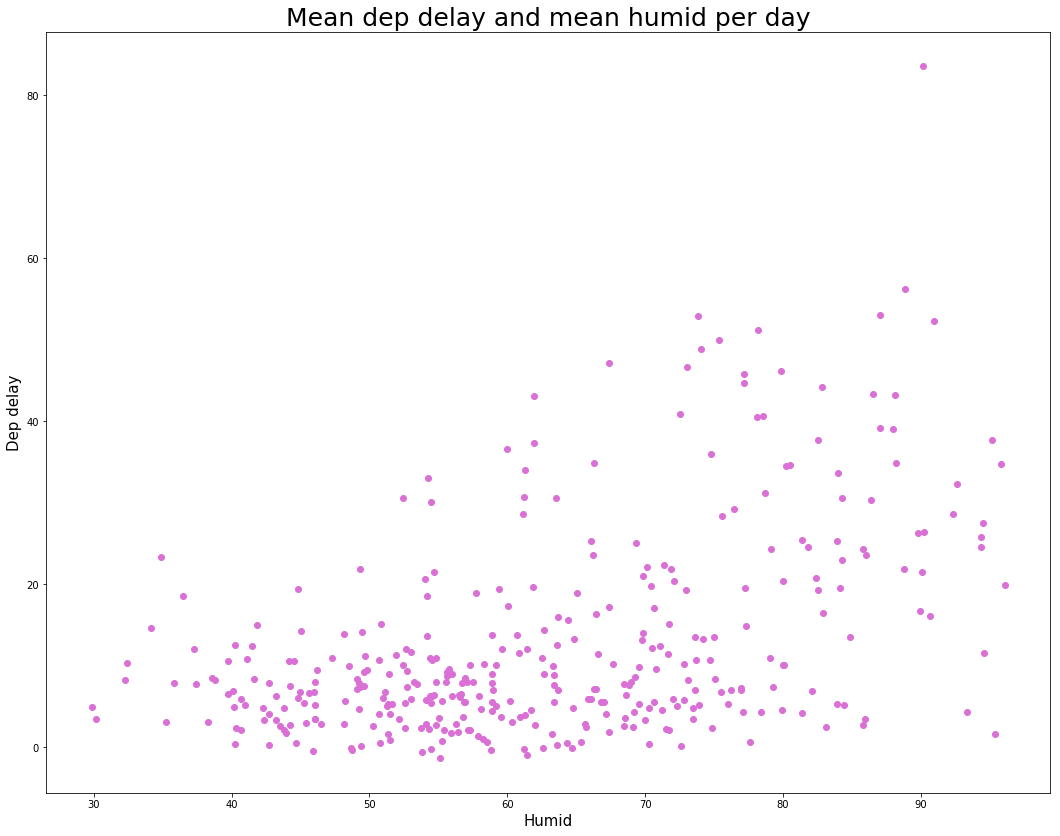

In [34]:
plt.figure(figsize=(18,14))
humid = flight_weather.groupby(['month', 'day'])['humid'].mean()
delay = flights.groupby(['month', 'day'])['dep_delay'].mean()
delay_correct = delay.drop(labels = [delay.index[-1]])
plt.scatter(humid, delay_correct, c='orchid')
plt.xlabel('Humid', size=15)
plt.ylabel("Dep delay", size=15)
plt.title('Mean dep delay and mean humid per day', size=25)
plt.show()

        Чем больше влажность, тем больше получается задержка.

~ зависимость от скорости ветра:

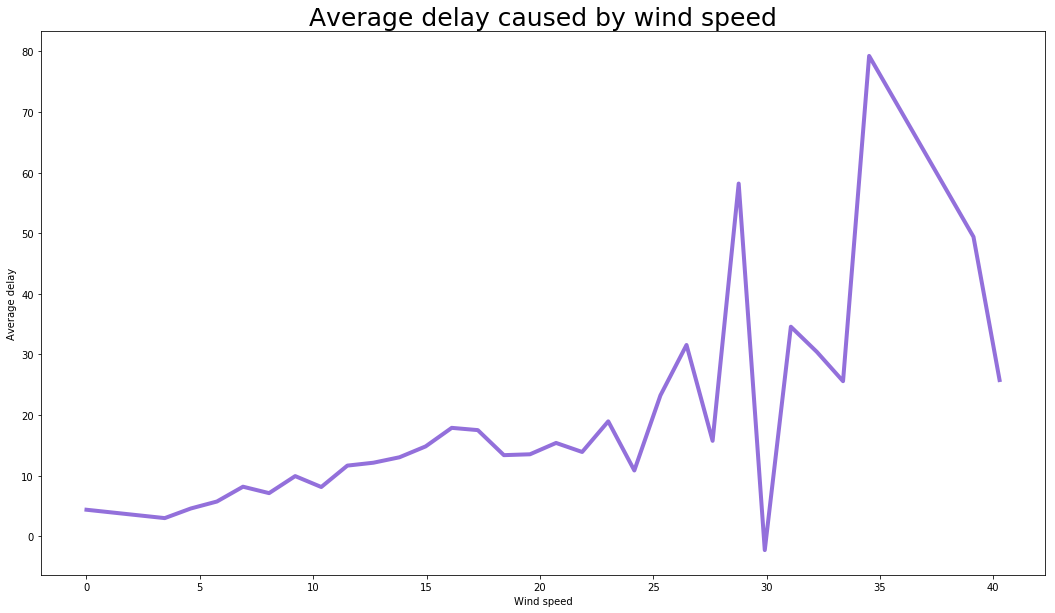

In [41]:
plt.figure(figsize=(18,10))
wind_speed_del = pd.DataFrame(flight_weather.groupby('wind_speed')['arr_delay'].mean())
wind_speed_del.sort_index()
wind_speed_del = wind_speed_del.drop(labels=[wind_speed_del.index[-1]])
plt.plot(wind_speed_del.index, wind_speed_del, c= 'mediumpurple', linewidth=4)
plt.xlabel('Wind speed')
plt.ylabel('Average delay')
plt.title('Average delay caused by wind speed', size =25)
plt.show()

        Время задержки в среднем увеличивается с увеличением скорости ветра. Скорость ветра является наиболее значимым
        погодным фактором.

Рассмотрим зависимость одной из причин задержек авиарейсов - видимости - от различных погодных факторов:

~ зависимость от направления ветра:

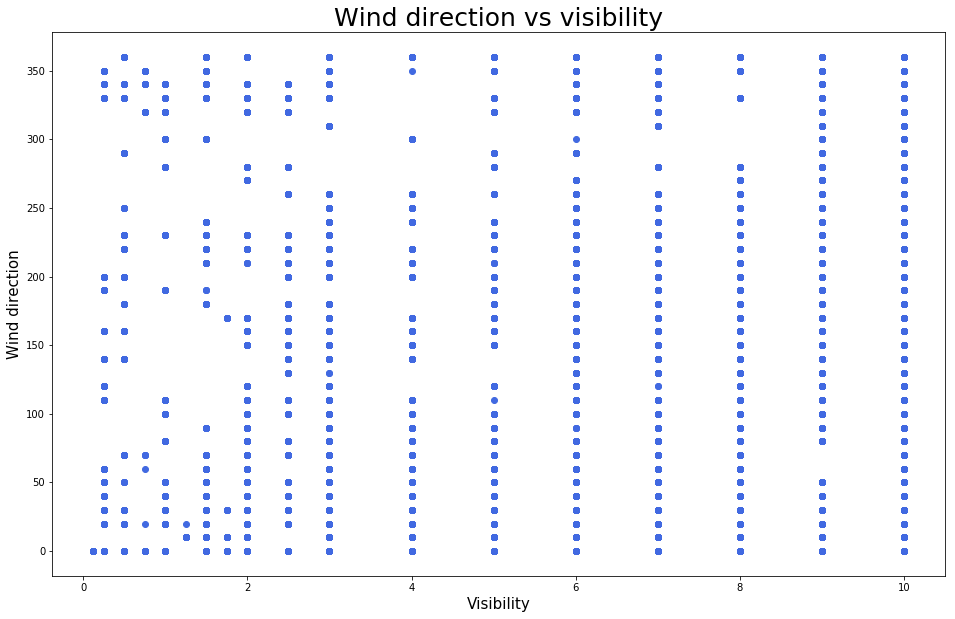

In [49]:
plt.figure(figsize=(16,10))
plt.scatter(flight_weather['visib'], flight_weather['wind_dir'], c='royalblue')
plt.xlabel('Visibility', size=15)
plt.ylabel('Wind direction', size=15)
plt.title('Wind direction vs visibility', size=25)
plt.show()

         Видимость не зависит от направления ветра.

~ зависимость от атмосферного давления:

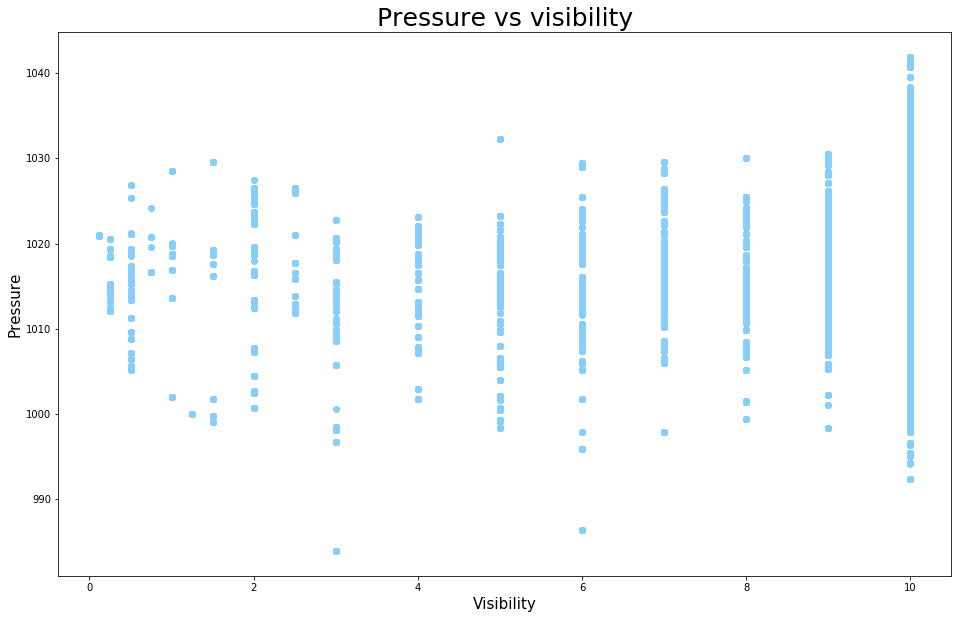

In [47]:
plt.figure(figsize=(16,10))
plt.scatter(flight_weather['visib'], flight_weather['pressure'], c='lightskyblue')
plt.xlabel('Visibility', size=15)
plt.ylabel('Pressure', size=15)
plt.title('Pressure vs visibility', size=25)
plt.show()

         Видимость не зависит от атмосферного давления.

~ зависимость от влажности воздуха:

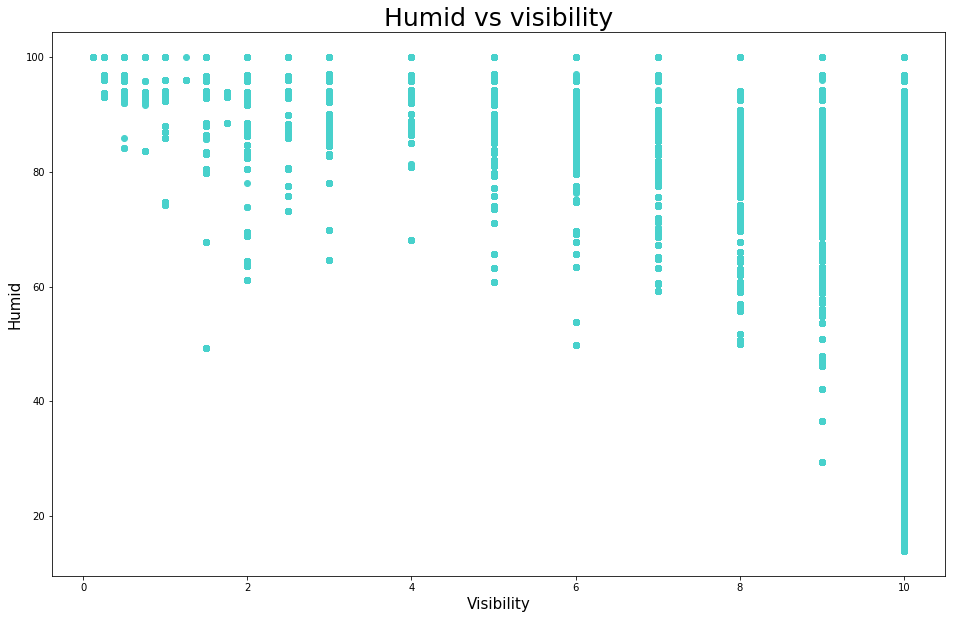

In [48]:
plt.figure(figsize=(16,10))
plt.scatter(flight_weather['visib'], flight_weather['humid'], c='mediumturquoise')
plt.xlabel('Visibility', size=15)
plt.ylabel('Humid', size=15)
plt.title('Humid vs visibility', size=25)
plt.show()

         Видимость зависит от влажности. Чем влажнее воздух, тем меньше видимость. Полеты в такую погоду могут быть 
         небезопасными. 

Рассмотрим зависимость задержек авиарейсов от аэропорта:

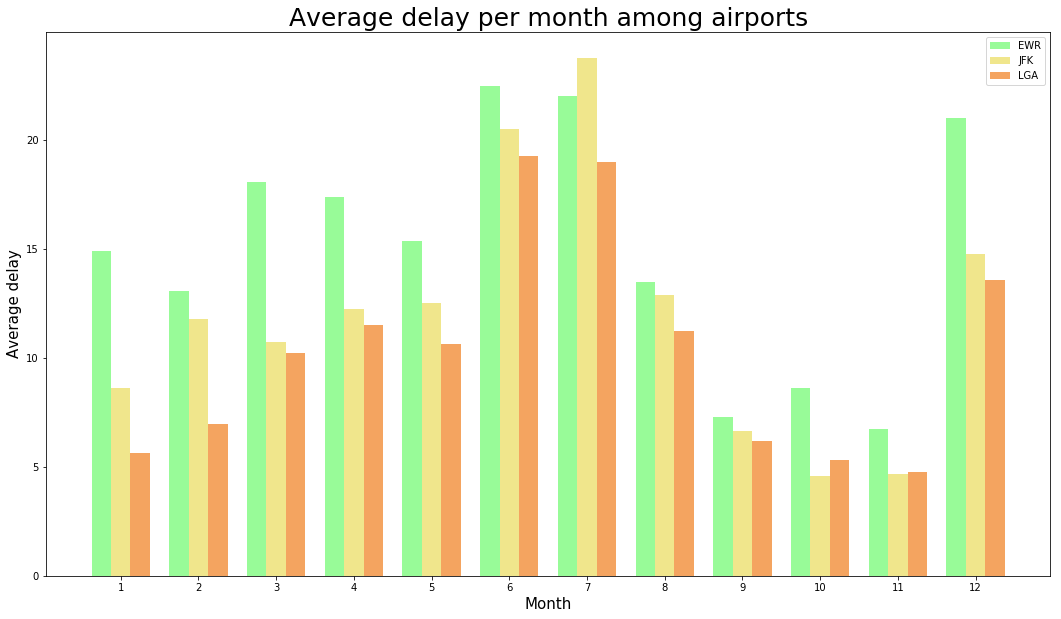

In [52]:
EWR = flights[flights.origin == 'EWR'].groupby('month')['dep_delay'].mean()
JFK = flights[flights.origin == 'JFK'].groupby('month')['dep_delay'].mean()
LGA = flights[flights.origin == 'LGA'].groupby('month')['dep_delay'].mean()
plt.figure(figsize=(18,10))
width = 0.25
plt.bar(EWR.index, EWR, width, color='palegreen', label='EWR')
plt.bar(JFK.index + width, JFK, width, color='khaki', label='JFK')
plt.bar(LGA.index + 2*width, LGA, width, color='sandybrown', label='LGA')
plt.xticks(EWR.index + width, EWR.index)
plt.xlabel('Month', size=15)
plt.ylabel('Average delay', size=15)
plt.title('Average delay per month among airports', size=25)
plt.legend(loc='upper right')
plt.show()

Для уменьшения количества задержек стоит перенести нагрузку с EWR на LGA.

Рассмотрим среднее время задержки авиарейсов в зависимости от компании:

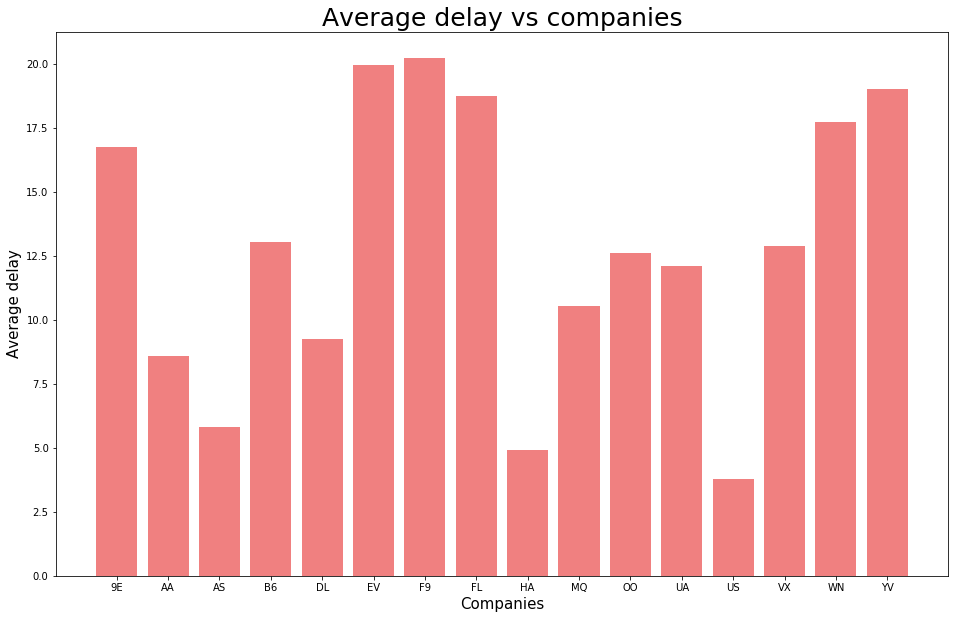

In [56]:
companies_del = flights.groupby(['carrier'])['dep_delay'].mean()
plt.figure(figsize=(16,10))
plt.bar(companies_del.index, companies_del, color='lightcoral')
plt.xlabel('Companies',size=15)
plt.ylabel('Average delay', size=15)
plt.title('Average delay vs companies', size=25)
plt.show()

Наиболее ответственными оказались компании US, HA, AS, следовательно, лучше выбирать их в качестве авиаперевозчика.

# Вывод:

Задержки авиарейсов связаны со многими факторами. Например, такими, как плохие погодные условия. На них люди повлиять не могут, и с задержками такого типа можно только смириться. Но тот факт, что у некоторых компаний задержки происходят чаще, чем у других, говорит нам о человеческом факторе. Необходимо перераспределить разгрузку по аэропортам, набрать дополнительных сотрудников на ночные смены, разобраться с безответственными сотрудниками для уменьшения количества задержек, тем самым увеличив продуктивность и качество обслуживания.